In [1]:
# Regression Modeling 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as scp
from scipy import stats
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

In [2]:
# 1 Linear Regression Model / Insurance Forecast

data = pd.read_csv('data/insurance.csv', sep=",", header=0)

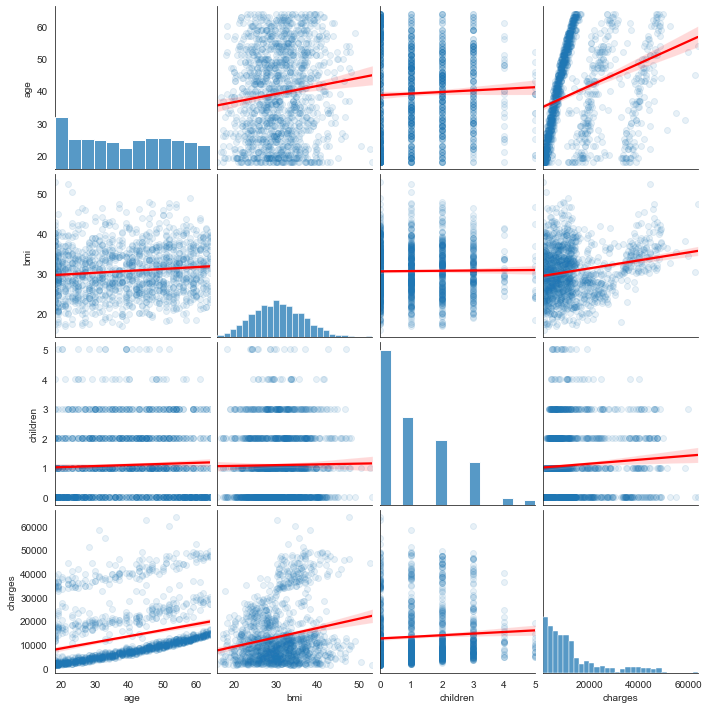

In [6]:
sns.set_style("white")
sns.pairplot(data, kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.1}})
plt.show()

We see some correlation for charges and age as well as for bmi and age, so we will investigate these two types

In [4]:
r = np.corrcoef(data.bmi,data.age)
r

array([[1.        , 0.10927188],
       [0.10927188, 1.        ]])

In [5]:
r = np.corrcoef(data.age,data.charges)
r

array([[1.        , 0.29900819],
       [0.29900819, 1.        ]])

In [6]:
r = np.corrcoef(data.bmi,data.charges)
r

array([[1.        , 0.19834097],
       [0.19834097, 1.        ]])

The best correlation relationship is age with charges, still having a very small correlation coefficient of 0.3

In [7]:
X = data.age.values
X = X[:, np.newaxis]

# For Y it is enough to extract the values,
# because Scikit already expects it to be 1D
Y = data.charges.values

# Now we load the required function from the scikit module
from sklearn.linear_model import LinearRegression
# Create the model
modelXY = LinearRegression(fit_intercept=True)
# Fit the model to 
XY_fit = modelXY.fit(X, Y)

# And extract the coefficients. 
# Note that b1 is returned as an array 
b1 = XY_fit.coef_[0]
b0 = XY_fit.intercept_

print("The regression line is y = {:.6} + {:.6} x".format(b0, b1))



The regression line is y = 3165.89 + 257.723 x


In [103]:
# Create an array from the list of X coordinates of new observtions
X_new = np.array([0.3])
# Make it 2D
X_new = X_new[:, np.newaxis]
# Use the predict method from our model
Y_new = XY_fit.predict(X_new)
# Look at the predicted values
Y_new

array([3243.20179166])

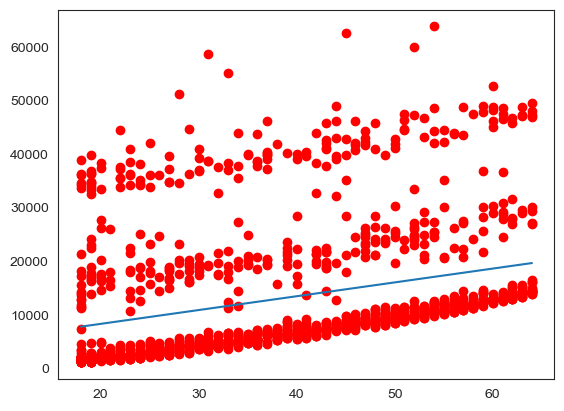

In [8]:
# The linspace funtion generates the grid
X_new = np.linspace(X.min(), X.max(), num = 100)
# Make it 2D
X_new = X_new[:, np.newaxis]

# Predict the corresponding Y-values
Y_new = XY_fit.predict(X_new)

#Plot the sample
plt.plot(X, Y, 'ro')
# And the regression line = "predicted points"
plt.plot(X_new, Y_new)
plt.show()

The reegression line is not really ideal but would make sense, taking into account that many values of the charges are below 10k

In [9]:
# Now we create our regression model
model_DF0 = LinearRegression(fit_intercept=True)
X = data.age.values[:, np.newaxis]
Y = data.charges.values
model_DF0 = LinearRegression(fit_intercept=True)
DF0_fit = model_DF0.fit(X, Y)

In [10]:
b1 = DF0_fit.coef_[0]
b0 = DF0_fit.intercept_
print("b0 = {:.6}, b1 = {:.6}".format(b0, b1))

b0 = 3165.89, b1 = 257.723


In [11]:
model_DF0_resid = Y - DF0_fit.predict(X)

In [12]:
# The sample size
n = len(data)
# Uncomment the following line to see that the mean of the residuals is 0
# print(model_DF_resid.mean())
resid_variance = (model_DF0_resid**2).sum() / (n - 2)
print("The residual variance for this data and regression line is {:.6}".format(resid_variance))

The residual variance for this data and regression line is 1.33641e+08


Looking at the residual variance (very  high), the model is not really able to explain the variation in  the  data

In [13]:
b0_variance = resid_variance * (1 / n + X.mean()**2/ ((X - X.mean())**2).sum())
b1_variance = resid_variance / ((n - 1) * X.std(ddof = 1)**2)

b0_se = np.sqrt(b0_variance) 
b1_se = np.sqrt(b1_variance)

print("b0_se = {:.6}".format(b0_se))
print("b1_se = {:.6}".format(b1_se))

b0_se = 937.149
b1_se = 22.5024


In [14]:
alpha = 0.05
talpha = stats.t.isf(alpha / 2, df = n - 2)

CI_beta1 = b1 + np.array([-1, 1]) * talpha * b1_se

print("The confidence interval for the regression model slope is [{:.4}, {:.4}]".format(CI_beta1[0], CI_beta1[1]))



The confidence interval for the regression model slope is [213.6, 301.9]


In [16]:
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
X_1 = sm.add_constant(data.age)
print(X_1)

model_DF0 = sm.OLS(data.charges,data.age) # OLS comes from Ordinary Least Squares

      const  age
0       1.0   19
1       1.0   18
2       1.0   28
3       1.0   33
4       1.0   32
...     ...  ...
1333    1.0   50
1334    1.0   18
1335    1.0   18
1336    1.0   21
1337    1.0   61

[1338 rows x 2 columns]


In [17]:
DF0_fit = model_DF0.fit()

In [18]:
DF0_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.583
Model:                            OLS   Adj. R-squared (uncentered):              0.583
Method:                 Least Squares   F-statistic:                              1868.
Date:                Tue, 01 Nov 2022   Prob (F-statistic):                   3.95e-256
Time:                        20:25:55   Log-Likelihood:                         -14421.
No. Observations:                1338   AIC:                                  2.884e+04
Df Residuals:                    1337   BIC:                                  2.885e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          329.2873      7.618     43.224      0.000     314.343     344.232
==============================================================================
Omnibus:                      393.480   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              840.455
Skew:                           1.714   Prob(JB):                    3.14e-183
Kurtosis:                       4.823   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
DF0_fit.pvalues

age    3.951600e-256
dtype: float64

The p-value is so small that we reject the null hypothesis, indicating a correlation for variables age and charges

In [20]:
X_new = np.linspace(X.min(), X.max(), 1338)
X_new = sm.add_constant(X_new)
X_new[:5, :]

array([[ 1.        , 18.        ],
       [ 1.        , 18.03440539],
       [ 1.        , 18.06881077],
       [ 1.        , 18.10321616],
       [ 1.        , 18.13762154]])

In [21]:
DF0_fit.pred = DF0_fit.get_prediction(X)

In [22]:
DF0_fit.pred.summary_frame(alpha=0.05).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6256.458175,144.743577,5972.508927,6540.407424,-16511.767283,29024.683634
1,5927.170903,137.125494,5658.166352,6196.175454,-16840.873080,28695.214886
2,9220.043627,213.306324,8801.592103,9638.495150,-13550.256438,31990.343691
3,10866.479989,251.396739,10373.304978,11359.654999,-11905.315833,33638.275810
4,10537.192716,243.778656,10058.962403,11015.423029,-12234.284346,33308.669778


In [23]:
DF0_fit_fitted_new = DF0_fit.pred.summary_frame(alpha=0.05)["mean"]
DF0_fit_confBand_low = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_lower"]
DF0_fit_confBand_high = DF0_fit.pred.summary_frame(alpha=0.05)["mean_ci_upper"]
DF0_fit.pred.summary_frame(alpha=0.95).head()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6256.458175,144.743577,6247.380068,6265.536283,5528.537973,6984.378378
1,5927.170903,137.125494,5918.570591,5935.771215,5199.256502,6655.085303
2,9220.043627,213.306324,9206.665363,9233.421890,8492.057097,9948.030156
3,10866.479989,251.396739,10850.712750,10882.247228,10138.445638,11594.514339
4,10537.192716,243.778656,10521.903272,10552.482160,9809.168557,11265.216875


In [27]:
# Diagnostic plot
%run ./code/Linear_Reg_Diagnostic.py

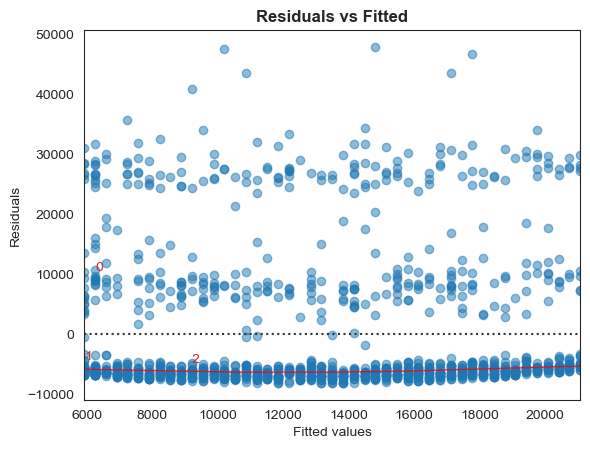

In [28]:
DF0_fit_diagnose = Linear_Reg_Diagnostic(DF0_fit)
DF0_fit_diagnose.residual_plot()
plt.show()

Here the residual does not seem to be a random process. We clearly see patterns of distribution of the residual.
We probably have taken wrong model assumptions. This is only a simple 1 variable linear regression, so you can't expect it to fit real life data all the time.

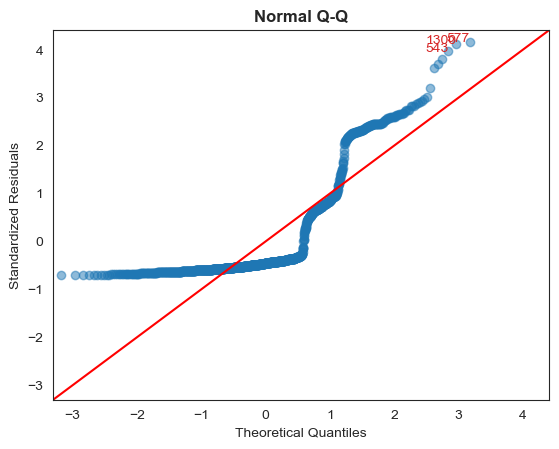

In [29]:
# Residual QQ plot
DF0_fit_diagnose.qq_plot()
plt.show()

We can really see visually that our model fails to fit our data here

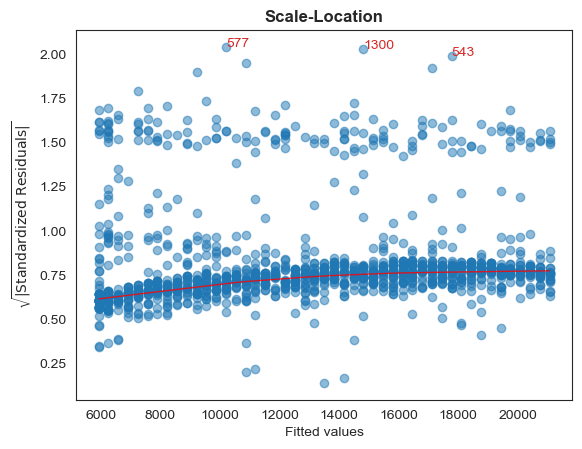

In [30]:
# Scale location plot
DF0_fit_diagnose.scale_location_plot()
plt.show()

Once again, we do not have a randomly distributed residual. It is safe to admit that our model isn't adapted to the data

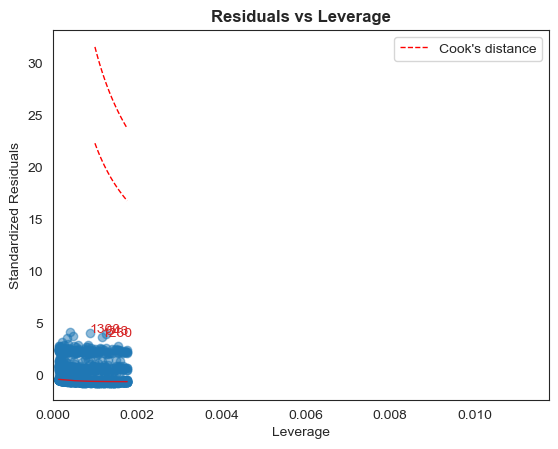

<Figure size 1120x480 with 0 Axes>

In [33]:
DF0_fit_diagnose.leverage_plot()
plt.figure(figsize=(14, 6), dpi=80)
plt.show()

Here no points cross the curves, so we technically have no outliers

In [37]:
# Regression model with more than 1 parameter and quadratic term

X = data.age.values
X2=X**2
Y = data.charges.values

S2=pd.DataFrame(data={'X':X, 'X2':X2, 'Y':Y})

S2.head()

,X,X2,Y
0,19,361,16884.92400
1,18,324,1725.55230
2,28,784,4449.46200
3,33,1089,21984.47061
4,32,1024,3866.85520


In [38]:
# Linear fit
S2_fit = sm.OLS(S2.Y, sm.add_constant(S2[["X", "X2"]])).fit()
S2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     66.50
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           2.96e-28
Time:                        20:58:11   Log-Likelihood:                -14414.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1335   BIC:                         2.885e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6508.5527   2699.359      2.411      0.016    1213.105    1.18e+04
X             64.5731    148.001      0.436      0.663    -225.766     354.912
X2             2.4389      1.847      1.320      0.187      -1.185       6.062
==============================================================================
Omnibus:                      401.205   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              871.169
Skew:                           1.736   Prob(JB):                    6.73e-190
Kurtosis:                       4.888   Cond. No.                     1.77e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X_new = np.linspace(S2.X.min(), S2.X.max(), 100)
newData = pd.DataFrame({'X':X_new, 'X2':X_new**2})
newData = sm.add_constant(newData)
newData.head()

,const,X,X2
0,1.0,18.000000,324.000000
1,1.0,18.464646,340.943169
2,1.0,18.929293,358.318131
3,1.0,19.393939,376.124885
4,1.0,19.858586,394.363432


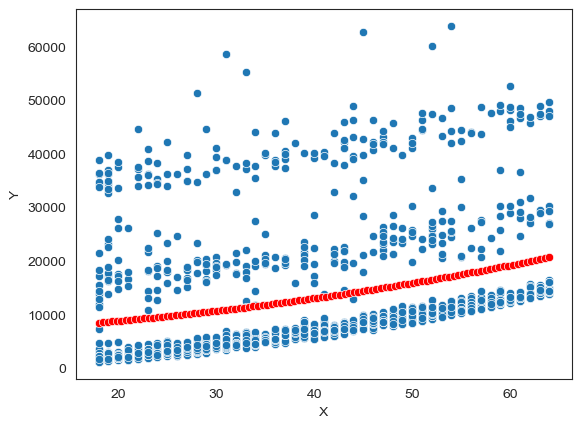

In [40]:
S2_pred = S2_fit.get_prediction(newData)
S2_fitted_new = S2_pred.summary_frame(alpha=0.05)["mean"]
S2_pred.summary_frame()
sns.scatterplot(x = S2.X, y = S2.Y)
sns.scatterplot(x = newData['X'], y = S2_pred.summary_frame()["mean"], color ="red")
plt.show()

This does seem like a better fit than before as the curve seems to follow the trend better, but it is far from an appropriate model as the data seems a lot more dispersed, even regrouped in different aggregations


In [46]:
# Multivariate regression with variables : Age + BMI ~ Charges

data_fit = sm.OLS(data.charges, sm.add_constant(data[["age", "bmi"]])).fit()
data_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     88.60
Date:                Tue, 01 Nov 2022   Prob (F-statistic):           7.39e-37
Time:                        21:04:22   Log-Likelihood:                -14394.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1335   BIC:                         2.881e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6424.8046   1744.091     -3.684      0.000   -9846.262   -3003.347
age          241.9308     22.298     10.850      0.000     198.187     285.674
bmi          332.9651     51.374      6.481      0.000     232.182     433.748
==============================================================================
Omnibus:                      321.874   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.574
Skew:                           1.511   Prob(JB):                    2.11e-129
Kurtosis:                       4.223   Cond. No.                         287.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that the fit is a bit better than the single variable linear regression (smaller R squared), slightly better log likelyhood.  

In [47]:
BMI_new = np.arange(data.bmi.min(), data.bmi.max(), 1)
AGE_new = np.repeat(49, len(BMI_new))
newData = pd.DataFrame({'BMI':BMI_new, 'AGE':AGE_new})
newData.head()

,BMI,AGE
0,15.96,49
1,16.96,49
2,17.96,49
3,18.96,49
4,19.96,49


Once again we are able to predict on new data if we wish

In [48]:
newData = sm.add_constant(newData, has_constant='add')
newData.head()

,const,BMI,AGE
0,1.0,15.96,49
1,1.0,16.96,49
2,1.0,17.96,49
3,1.0,18.96,49
4,1.0,19.96,49


In [49]:
data_pred = data_fit.get_prediction(newData)

Here are the model parameters

In [53]:
data_fit.params

const   -6424.804612
age       241.930778
bmi       332.965091
dtype: float64

And here are our pvalues

In [54]:
data_fit.pvalues

const    2.390091e-04
age      2.422136e-26
bmi      1.277594e-10
dtype: float64

The p-value are rather small so we reject the null hypothesis.
There certainly is a correlation between these variables.